<a href="https://colab.research.google.com/github/Sarach-git/CS-SBU-eDataMining-MSc-2022/blob/400422066/submits/400422066/project_1/Copy_of_Apartment_rental_offers_in_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-SBU-eDataMining-MSc-2022
Presented by Sara Charmchi  
Student ID : 400422066  

## Apartment rental offers in Germany
Rental offers scraped from Germany biggest real estate online plattform 
Dataset : https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany/code


# Importing libraries

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import branca.colormap as cm
import zipfile
from scipy import stats
import urllib
from geopy.distance import geodesic


%matplotlib inline
from skimage.io import imread

# Loading Data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saracharmchi","key":"06b771d04d3c49745c3e9246ff2d5a31"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 98% 91.0M/93.0M [00:01<00:00, 59.5MB/s]
100% 93.0M/93.0M [00:01<00:00, 55.9MB/s]


In [5]:
!ls

apartment-rental-offers-in-germany.zip	kaggle.json  sample_data


In [6]:
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [7]:
df=pd.read_csv('/content/files/immo_data.csv')

In [8]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [10]:
df.shape

(268850, 49)

In [11]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

# Q1-Cleaning data

*   Removing irrelevant columns
*   Filling missing data
*   Detecting outliers







In [12]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [13]:
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [14]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [15]:
df.shape

(268850, 42)

In [16]:
df = df.drop(df[df['livingSpace'] == 0.0].index)
df.shape

(268775, 42)

In [17]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268544, 42)

In [18]:
df = df.drop(df[df['noRooms'] > 100].index)
df.shape


(268536, 42)

In [19]:
df = df.loc[~((df['livingSpace'] == 60) & (df['baseRentRange']< 30)),:]
df.shape

(263351, 42)

In [20]:
df.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,256662.000000,263351.000000,261549.000000,230543.000000,2.237390e+05,207921.000000,2.633510e+05,207921.000000,2.633510e+05,263351.000000,263351.000000,263351.000000,263351.000000,159465.000000,213103.000000,167340.000000,263351.000000,263351.000000
mean,151.846785,9.800240,3.393385,28.811205,9.073327e+02,1966.506625,1.069985e+08,3.727194,6.982972e+02,74.661966,3.780931,37237.114273,2.637484,114.541773,2.124879,3.581206,2.577613,3.092610
std,311.320179,6.416116,1.965975,16.336400,3.357778e+04,47.134190,1.247639e+07,2.744810,1.973887e+04,257.390969,2.220518,27806.495514,1.096274,61.536676,3.666800,6.441976,0.942891,1.412659
min,0.000000,0.000000,-12.330000,1.000000,1.000000e+00,1000.000000,2.887174e+07,1.000000,0.000000e+00,1.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000
25%,95.000000,6.000000,2.000000,10.000000,4.700000e+02,1950.000000,1.067174e+08,1.000000,3.390000e+02,54.000000,2.000000,9127.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000
50%,135.000000,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111615e+08,3.000000,4.950000e+02,68.000000,3.000000,38550.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000
75%,190.000000,13.000000,4.580000,40.000000,9.900000e+02,1996.000000,1.137701e+08,5.000000,8.000000e+02,87.380000,5.000000,57072.000000,3.000000,140.000000,3.000000,4.000000,3.000000,4.000000
max,146118.000000,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,100.000000,1996.000000,999.000000,999.000000,5.000000,7.000000


In [21]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [22]:
df.isna().sum()/len(df)

regio1                  0.000000
serviceCharge           0.000000
heatingType             0.167184
telekomTvOffer          0.121849
newlyConst              0.000000
balcony                 0.000000
picturecount            0.000000
pricetrend              0.000000
telekomUploadSpeed      0.000000
totalRent               0.000000
yearConstructed         0.000000
scoutId                 0.000000
firingTypes             0.211596
hasKitchen              0.000000
geo_bln                 0.000000
cellar                  0.000000
yearConstructedRange    0.000000
baseRent                0.000000
houseNumber             0.262995
livingSpace             0.000000
geo_krs                 0.000000
condition               0.254615
interiorQual            0.419300
petsAllowed             0.427513
street                  0.000000
streetPlain             0.262976
lift                    0.000000
baseRentRange           0.000000
typeOfFlat              0.136248
geo_plz                 0.000000
noRooms   

In [23]:
df.duplicated().sum()

0

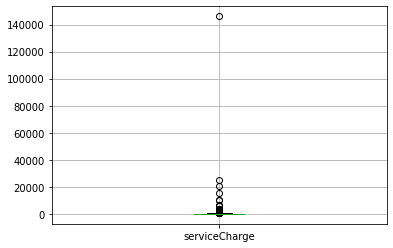

In [24]:
#sns.distplot(df['serviceCharge'])
df.boxplot(column='serviceCharge')

In [25]:
upper_range=df['serviceCharge'].mean()+ 3* df['serviceCharge'].std()
lower_range=df['serviceCharge'].mean()- 3* df['serviceCharge'].std()

indexes=df[(df['serviceCharge']>upper_range)| (df['serviceCharge']<lower_range)].index
df=df.drop(indexes)


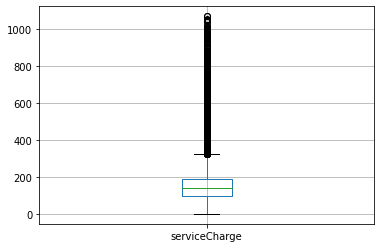

In [26]:
df.boxplot(column='serviceCharge')

In [27]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

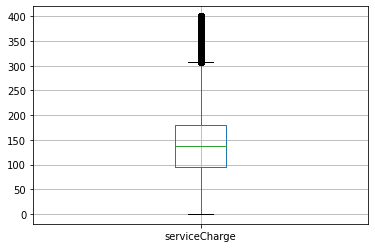

In [28]:
df.boxplot(column='serviceCharge')

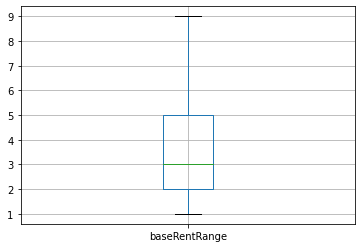

In [29]:
df.boxplot(column='baseRentRange')

In [30]:
df_g=df.copy()

df_g.drop(columns=['livingSpaceRange','street','description','facilities','geo_krs','geo_plz','scoutId','telekomUploadSpeed','telekomTvOffer','pricetrend','regio3','noRoomsRange','picturecount','geo_bln','date',\
    'houseNumber','streetPlain','firingTypes','yearConstructedRange'],inplace=True)

In [31]:
df_g.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift',
       'baseRentRange', 'typeOfFlat', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'garden', 'regio2'],
      dtype='object')

fillna numeric data by mean

In [32]:
df_g._get_numeric_data().mean()

serviceCharge       145.127661
newlyConst            0.081832
balcony               0.615844
totalRent           797.905627
yearConstructed    1968.156286
hasKitchen            0.331762
cellar                0.638217
baseRent            615.747746
livingSpace          71.678676
lift                  0.233900
baseRentRange         3.679879
noRooms               2.589142
thermalChar         112.215570
floor                 2.074239
numberOfFloors        3.518956
garden                0.189399
dtype: float64

In [33]:
df_g.fillna(df._get_numeric_data().mean(),inplace = True)
df_g.isna().sum()

regio1                  0
serviceCharge           0
heatingType         41617
newlyConst              0
balcony                 0
totalRent               0
yearConstructed         0
hasKitchen              0
cellar                  0
baseRent                0
livingSpace             0
condition           62814
interiorQual       103368
petsAllowed        104243
lift                    0
baseRentRange           0
typeOfFlat          33028
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
garden                  0
regio2                  0
dtype: int64

fillna categorical data

In [34]:
for cols in df_g.columns:
    if df_g[cols].dtype == 'object' or df_g[cols].dtype == 'bool':
        print('column : ',cols)
        print(df_g[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    55850
Name: regio1, dtype: int64
column :  heatingType
central_heating    113710
Name: heatingType, dtype: int64
column :  newlyConst
False    220914
Name: newlyConst, dtype: int64
column :  balcony
True    148174
Name: balcony, dtype: int64
column :  hasKitchen
False    160780
Name: hasKitchen, dtype: int64
column :  cellar
True    153557
Name: cellar, dtype: int64
column :  condition
well_kept    59407
Name: condition, dtype: int64
column :  interiorQual
normal    73093
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    81344
Name: petsAllowed, dtype: int64
column :  lift
False    184326
Name: lift, dtype: int64
column :  typeOfFlat
apartment    118485
Name: typeOfFlat, dtype: int64
column :  garden
False    195033
Name: garden, dtype: int64
column :  regio2
Leipzig    12774
Name: regio2, dtype: int64


In [35]:
for cols in df_g.columns:
    if df_g[cols].dtype == 'object' or df_g[cols].dtype == 'bool':
        print('cols : {} , value : {}'.format(cols , df_g[cols].value_counts().head(1).index[0]))
        df_g[cols].fillna(df_g[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : newlyConst , value : False
cols : balcony , value : True
cols : hasKitchen , value : False
cols : cellar , value : True
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig


In [36]:
df_g.isna().sum()

regio1             0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
cellar             0
baseRent           0
livingSpace        0
condition          0
interiorQual       0
petsAllowed        0
lift               0
baseRentRange      0
typeOfFlat         0
noRooms            0
thermalChar        0
floor              0
numberOfFloors     0
garden             0
regio2             0
dtype: int64

In [37]:
df_g.shape

(240603, 23)

In [38]:
df_g.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift',
       'baseRentRange', 'typeOfFlat', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'garden', 'regio2'],
      dtype='object')

In [39]:
df_g.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,...,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,garden,regio2
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.000000,1965.0,False,True,595.0,...,negotiable,False,4,ground_floor,4.0,181.400000,1.000000,3.000000,True,Dortmund
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,907.332726,1871.0,False,False,800.0,...,no,False,5,ground_floor,3.0,114.541773,2.124879,3.581206,False,Rhein_Pfalz_Kreis
2,Sachsen,255.00,floor_heating,True,True,1300.000000,2019.0,False,True,965.0,...,negotiable,True,6,apartment,3.0,114.541773,3.000000,4.000000,False,Dresden
3,Sachsen,58.15,district_heating,False,True,907.332726,1964.0,False,False,343.0,...,negotiable,False,2,other,3.0,86.000000,3.000000,3.581206,False,Mittelsachsen_Kreis
4,Bremen,138.00,self_contained_central_heating,False,True,903.000000,1950.0,False,False,765.0,...,negotiable,False,5,apartment,3.0,188.900000,1.000000,3.581206,False,Bremen


categorical data

In [40]:
df_g.petsAllowed.unique()

array(['negotiable', 'no', 'yes'], dtype=object)

In [41]:
df_g['regio1'].value_counts()*100/len(df_g)

Nordrhein_Westfalen       23.212512
Sachsen                   22.302299
Bayern                     7.982444
Sachsen_Anhalt             7.735980
Hessen                     6.496594
Niedersachsen              6.245142
Baden_Württemberg          5.957947
Thüringen                  3.226477
Rheinland_Pfalz            3.144184
Berlin                     2.981260
Brandenburg                2.619252
Mecklenburg_Vorpommern     2.566053
Schleswig_Holstein         2.505372
Hamburg                    1.346201
Bremen                     1.146702
Saarland                   0.531581
Name: regio1, dtype: float64

In [42]:
def edit_regio1(x):
    if x in ['Hamburg','Bremen','Saarland']:
        return 'other'
    else:
        return x
    
df_g['regio1_edit'] = df_g['regio1'].apply(edit_regio1)
df_g = df_g.drop(columns = ['regio1'])

In [43]:
df_g['regio1_edit'].value_counts()*100/len(df_g)

Nordrhein_Westfalen       23.212512
Sachsen                   22.302299
Bayern                     7.982444
Sachsen_Anhalt             7.735980
Hessen                     6.496594
Niedersachsen              6.245142
Baden_Württemberg          5.957947
Thüringen                  3.226477
Rheinland_Pfalz            3.144184
other                      3.024484
Berlin                     2.981260
Brandenburg                2.619252
Mecklenburg_Vorpommern     2.566053
Schleswig_Holstein         2.505372
Name: regio1_edit, dtype: float64

# Q2-Data Visualization

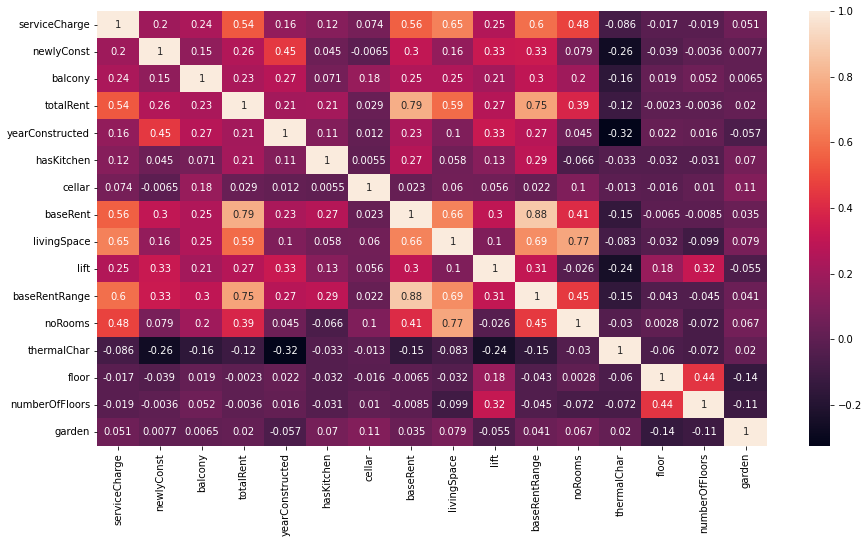

In [44]:
corr = df_g.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [45]:
df_g.regio1_edit.value_counts().iloc[:10]

Nordrhein_Westfalen    55850
Sachsen                53660
Bayern                 19206
Sachsen_Anhalt         18613
Hessen                 15631
Niedersachsen          15026
Baden_Württemberg      14335
Thüringen               7763
Rheinland_Pfalz         7565
other                   7277
Name: regio1_edit, dtype: int64

In [46]:
df_g.regio2.value_counts().iloc[:10]

Leipzig              12774
Chemnitz             11636
Berlin                7173
Dresden               7047
Magdeburg             4485
Halle_Saale           4290
Essen                 3846
München               3636
Frankfurt_am_Main     3601
Hamburg               3239
Name: regio2, dtype: int64

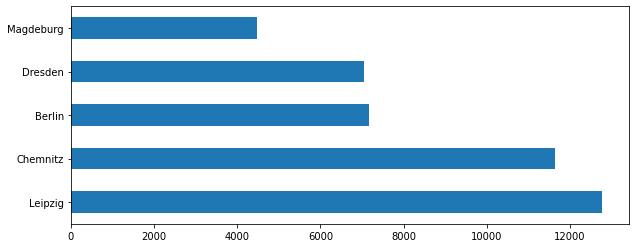

In [47]:
plt.figure(figsize=(10,4))
df_g.regio2.value_counts().iloc[:5].plot(kind = 'barh')

In [48]:
df_g.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'garden', 'regio2', 'regio1_edit'],
      dtype='object')

In [49]:
df_city= df_g.groupby(['regio1_edit','regio2'])['baseRent'].mean().reset_index()

In [50]:
top_city_each= df_city.loc[df_city.groupby('regio1_edit')['baseRent'].idxmax()].sort_values(by='baseRent',ascending=False)
top_city_each

,regio1_edit,regio2,baseRent
102,Bayern,München,1575.775569
38,Baden_Württemberg,Stuttgart,1296.229845
162,Hessen,Frankfurt_am_Main,1272.569747
412,other,Hamburg,1083.463927
140,Berlin,Berlin,1018.668882
332,Rheinland_Pfalz,Speyer,996.754028
262,Nordrhein_Westfalen,Düsseldorf,966.343633
153,Brandenburg,Potsdam,861.885913
221,Niedersachsen,Harburg_Kreis,806.646505
386,Schleswig_Holstein,Stormarn_Kreis,805.631480


Text(0, 0.5, 'baseRent')

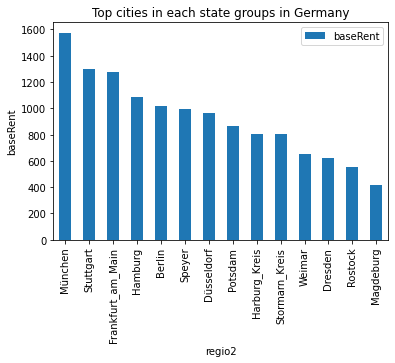

In [51]:
top_city_each.plot.bar(x='regio2', rot=90, title='Top cities in each state groups in Germany')
plt.xlabel('regio2')
plt.ylabel('baseRent')

In [52]:
df_flat= df_g.groupby(['typeOfFlat','regio1_edit'])['baseRent'].mean().reset_index()

In [53]:
top_flat_type= df_flat.loc[df_flat.groupby('typeOfFlat')['baseRent'].idxmax()].sort_values(by='baseRent',ascending=False)
top_flat_type

,typeOfFlat,regio1_edit,baseRent
86,penthouse,Berlin,1903.851778
44,loft,Berlin,1574.337931
58,maisonette,Berlin,1415.626783
114,roof_storey,Berlin,1315.278607
128,terraced_flat,Berlin,1273.992258
72,other,Berlin,1040.130694
2,apartment,Berlin,962.908263
16,ground_floor,Berlin,929.009412
102,raised_ground_floor,Hessen,920.475919
41,half_basement,other,718.684186


Text(0, 0.5, 'baseRent')

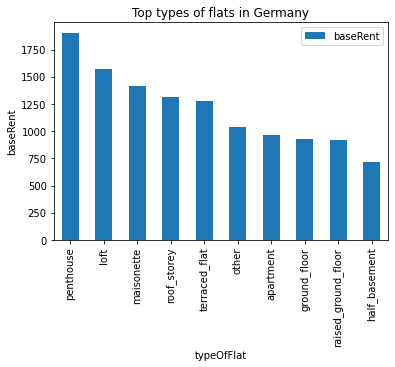

In [54]:
top_flat_type.plot.bar(x='typeOfFlat', rot=90, title='Top types of flats in Germany')
plt.xlabel('typeOfFlat')
plt.ylabel('baseRent')

Text(0.5, 1.0, 'livingSpace-totalRent')

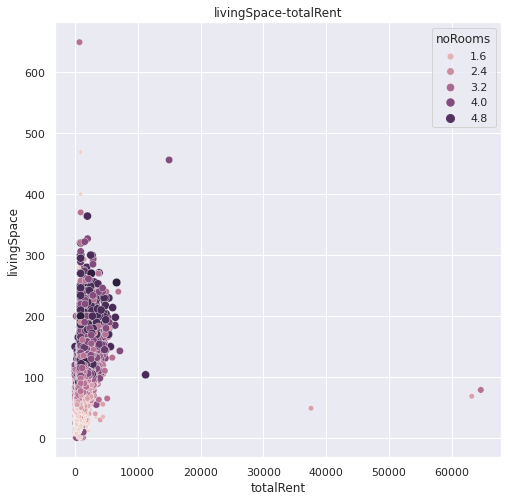

In [55]:
sns.set(rc={"figure.figsize": (8, 8)})
ax= sns.scatterplot(data=df_g, x="totalRent", y="livingSpace",hue='noRooms', size='noRooms')
ax.set_title('livingSpace-totalRent')

In [56]:
df_g.typeOfFlat.unique()

array(['ground_floor', 'apartment', 'other', 'roof_storey',
       'raised_ground_floor', 'half_basement', 'terraced_flat',
       'penthouse', 'maisonette', 'loft'], dtype=object)

In [57]:
df_g.typeOfFlat.value_counts()

apartment              151513
roof_storey             30826
ground_floor            28728
other                    8547
maisonette               7617
raised_ground_floor      5006
terraced_flat            2918
penthouse                2850
half_basement            1808
loft                      790
Name: typeOfFlat, dtype: int64

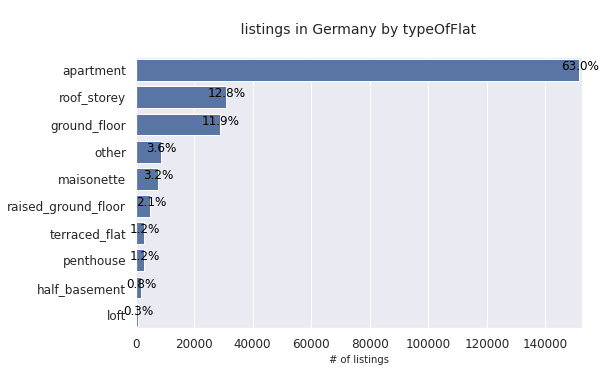

In [58]:
plt.figure(figsize = (8,5))
basecolor = sns.color_palette()[0]
sns.countplot(data = df_g, y = 'typeOfFlat', color = basecolor, 
              order = df_g['typeOfFlat'].value_counts().index)
plt.ylabel('')
plt.xlabel('# of listings', fontsize = 10)
plt.title('\n listings in Germany by typeOfFlat \n', fontsize = 14)

plt.xticks(fontsize =12)
plt.yticks(fontsize =12)

# add annotations
n_points = df_g.shape[0]
cat_counts = df_g['typeOfFlat'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels
plt.xlim((0,cat_counts.max()+1000))

# loop 
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+200, loc, pct_string, ha = 'center', color = 'black', fontsize = 12)

# code credit : https://www.geeksforgeeks.org/ for adding percentage to bar chart    


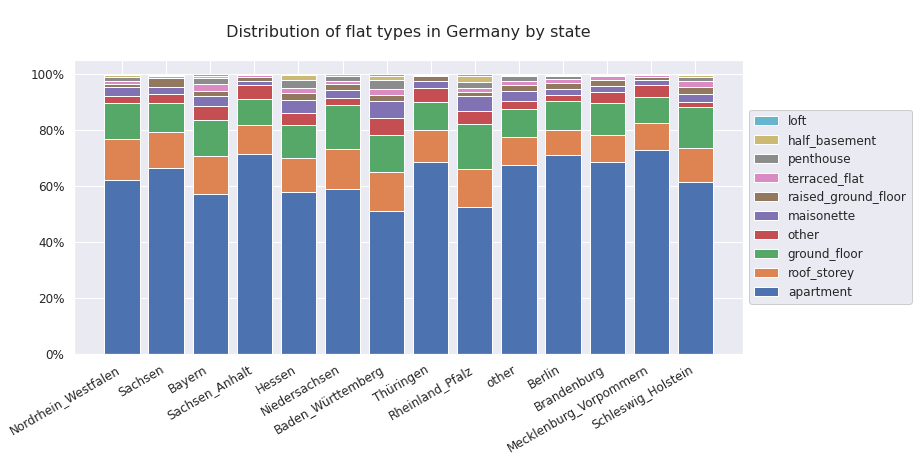

In [59]:

type_Of_Flat = pd.Series(df_g['typeOfFlat'].value_counts().index)
federal_state = pd.Series(df_g['regio1_edit'].value_counts().index)

plot_elements = [] # for storing references to plot elements
baselines = np.zeros(len(federal_state)) # stores the baseline for the next category plot
nb_counts = df_g['regio1_edit'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate()   # rotate text on x-axis

# for each second-variable category:
for i in range(len(type_Of_Flat)):
    # isolate the counts of the first category,
    rt = type_Of_Flat[i]
    inner_counts = df_g[df_g['typeOfFlat'] == rt]['regio1_edit'].value_counts()
    inner_props = inner_counts / nb_counts
     
    
    inner_props[inner_props.isnull()] = 0
    
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(federal_state)),
                   height = inner_props[federal_state],
                   bottom = baselines)
    plot_elements.append(bars)
    baselines += inner_props[federal_state]

plt.title('\n Distribution of flat types in Germany by state \n', fontsize = 16)
plt.xticks(np.arange(len(federal_state)), federal_state)
yt = np.arange(0, 1.1, .2)
plt.yticks(yt, ['{:1.0f}%'.format(100*x) for x in yt])
plt.legend(reversed(plot_elements), reversed(type_Of_Flat), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6, fontsize = 12);

ax.tick_params(axis='both', labelsize=12)

# code credit by : stackoverflow.com

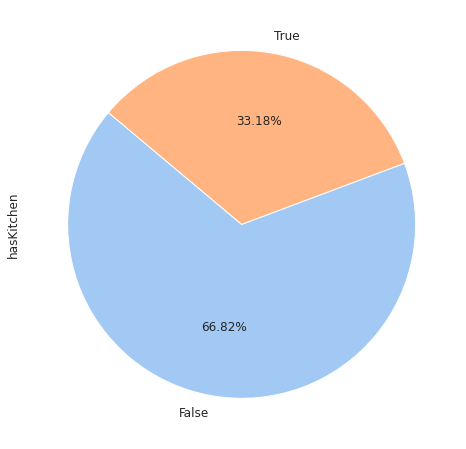

In [60]:
colors = sns.color_palette('pastel')[0:5]
#plt.figure(figsize=(10,8))
df_g['hasKitchen'].value_counts().plot(kind='pie',  autopct='%1.2f%%', startangle=140, fontsize=12, colors = colors)

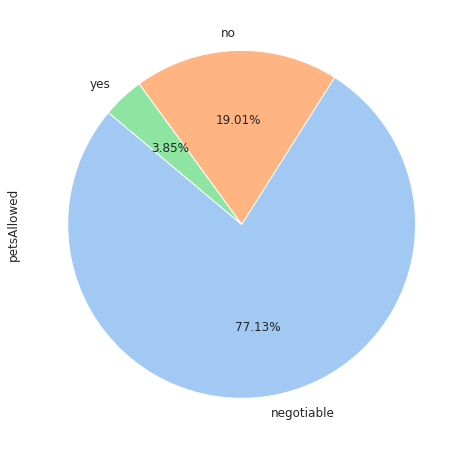

In [61]:
df_g['petsAllowed'].value_counts().plot(kind='pie',  autopct='%1.2f%%', startangle=140, fontsize=12, colors = colors)


In [62]:
df_g.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'garden', 'regio2', 'regio1_edit'],
      dtype='object')

In [63]:
df_prices = df_g.groupby("hasKitchen").agg([np.mean, np.std])

In [64]:
prices = df_prices['baseRent']
 
# checking for results
prices.head()

,mean,std
hasKitchen,,
False,535.291720,367.317486
True,777.802792,489.144801


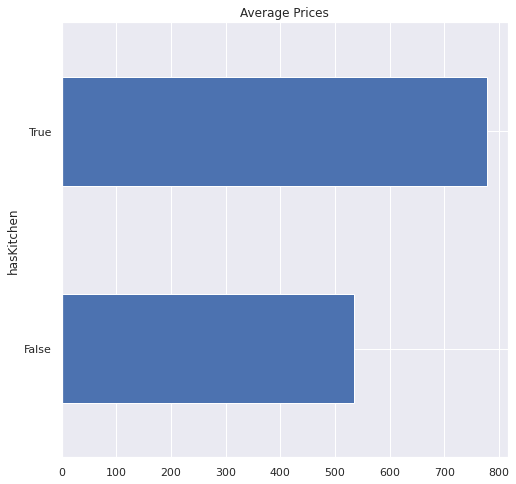

In [65]:
prices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices")

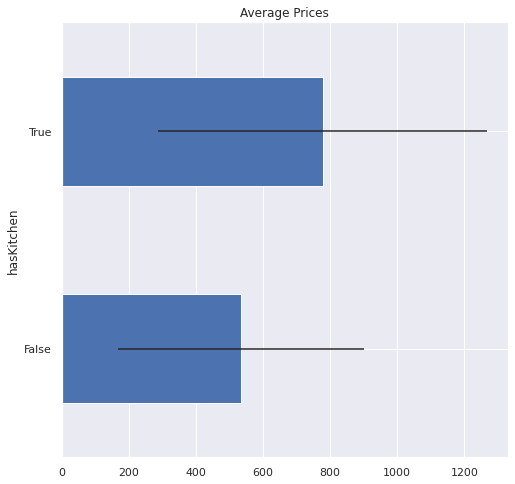

In [66]:
prices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices", xerr = "std")

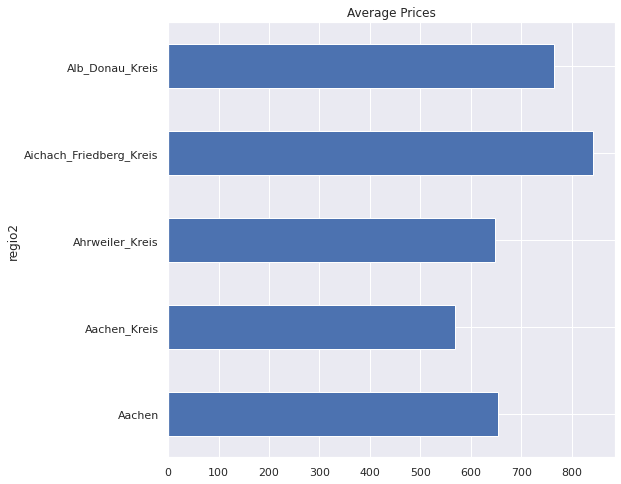

In [67]:
df_prices_city = df_g.groupby("regio2").agg([np.mean, np.std])
prices_city = df_prices_city['baseRent']
prices_city.iloc[:5].plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices")

# Price Prediction

In [68]:
grm_df = df_g.copy()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [70]:
encode = preprocessing.LabelEncoder()

In [71]:
grm_df.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'garden', 'regio2', 'regio1_edit'],
      dtype='object')

In [72]:
encode.fit(grm_df.regio1_edit)
grm_df.regio1_edit=encode.transform(grm_df.regio1_edit)

In [75]:
encode = preprocessing.LabelEncoder()
encode.fit(grm_df.regio2)
grm_df.regio2=encode.transform(grm_df.regio2)
encode = preprocessing.LabelEncoder()
encode.fit(grm_df.typeOfFlat)
grm_df.typeOfFlat=encode.transform(grm_df.typeOfFlat)
grm_df.sort_values(by='totalRent',ascending=True,inplace=True)

In [76]:
grm_df.head(10)

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,...,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,garden,regio2,regio1_edit
160144,0.000000,central_heating,False,False,1.00,1966.506625,True,False,1.0,20.00,...,False,1,5,1.0,114.541773,2.124879,3.581206,False,121,6
236196,151.846785,central_heating,False,False,1.00,1966.506625,False,True,1.0,47.51,...,True,1,0,2.0,114.541773,4.000000,3.581206,False,129,9
199459,102.000000,central_heating,False,True,1.00,1966.506625,True,True,995.0,56.00,...,False,6,0,2.0,126.000000,1.000000,3.000000,True,236,1
243082,152.000000,central_heating,False,True,1.00,1966.506625,False,True,459.0,70.60,...,False,3,0,3.0,114.541773,2.000000,4.000000,False,57,9
58666,163.000000,central_heating,False,False,1.00,1966.506625,False,True,459.0,76.00,...,False,3,8,3.0,114.541773,3.000000,3.000000,True,223,9
241782,245.000000,central_heating,True,True,1.00,2019.000000,True,False,1111.0,101.00,...,True,7,0,3.0,40.000000,1.000000,2.000000,False,142,6
173893,325.000000,central_heating,False,True,1.00,2009.000000,True,True,1087.0,81.00,...,True,7,6,2.0,111.600000,2.000000,3.000000,True,412,7
126908,70.000000,floor_heating,True,True,1.01,2018.000000,False,False,874.0,76.00,...,True,6,0,3.0,114.541773,4.000000,4.000000,True,264,3
27553,220.000000,central_heating,False,True,1.04,1966.506625,False,True,770.0,110.00,...,False,5,0,4.0,127.000000,2.000000,3.000000,True,177,1
83340,76.810000,floor_heating,True,True,1.08,2020.000000,False,True,924.0,78.00,...,False,6,0,3.0,114.541773,3.000000,3.000000,False,264,3


In [77]:
grm_df.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'garden', 'regio2', 'regio1_edit'],
      dtype='object')

In [78]:
l_reg = LinearRegression()
X = grm_df[['serviceCharge','regio1_edit','regio2','baseRentRange','livingSpace','noRooms','typeOfFlat','baseRent','numberOfFloors','yearConstructed','floor']]
y = grm_df['totalRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [79]:
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

Mean Squared Error:  186.1745819698833
R2 Score:  80.75206235908281
Mean Absolute Error:  110.94225582755931
Mean Squareroot Error:  34660.97497166079


In [80]:
#Actual Vs Predicted for Linear Regression
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))


   actual_values  predicted_values
0     588.000000        594.772067
1    1140.900000       1128.308182
2    2050.000000       1801.022446
3     595.000000        669.122486
4     907.332726        557.385081


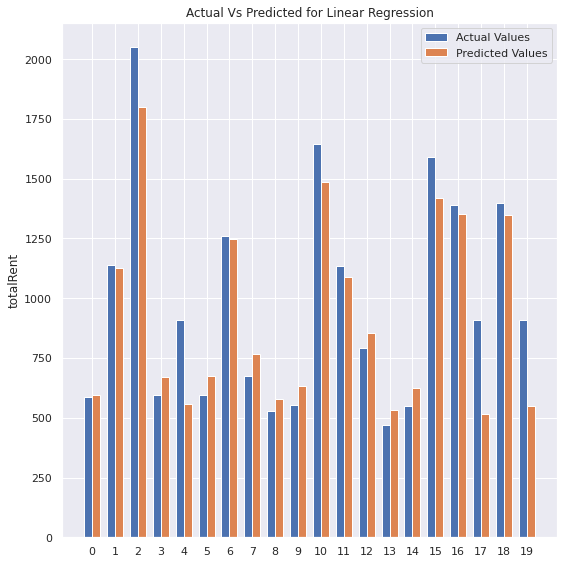

In [81]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('totalRent')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

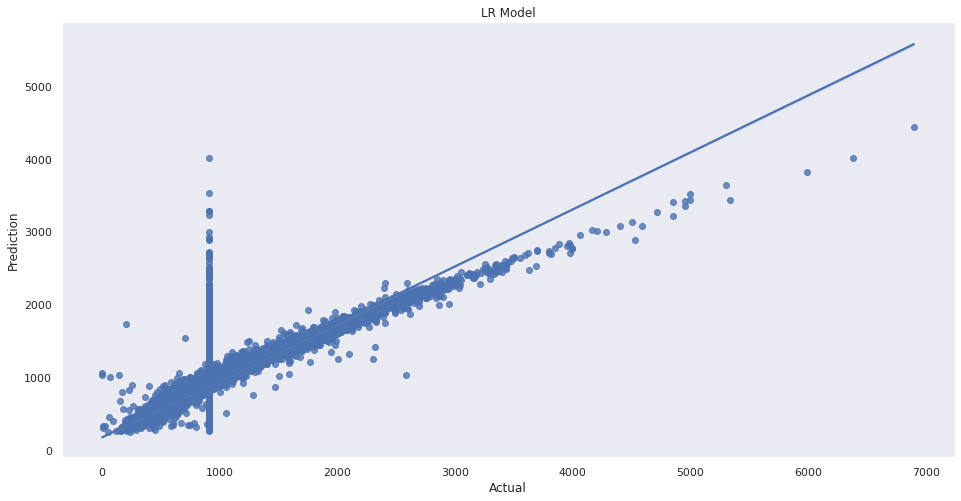

In [82]:
plt.figure(figsize=(16,8))
sns.regplot(y_test,predicts)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("LR Model")
plt.grid(False)
plt.show()